In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("medical_examination.csv")

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2))
df['overweight'] = df['overweight'].apply(lambda x:1 if x > 25 else 0 )

In [10]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 1 if x > 1 else 0)
df['gluc'] = df['gluc'].apply(lambda x: 1 if x > 1 else 0)

In [11]:
df_cat = pd.melt(df, id_vars=["cardio"], value_vars = ["cholesterol", "gluc", "smoke", "alco", "active", "overweight"]) 

In [13]:
df_cat_grouped = df_cat.groupby(['cardio','variable','value']).size().reset_index(name='count')

In [18]:
df_cat_grouped['value'] = df_cat_grouped['value'].astype(str)

In [19]:
df_cat_grouped = df_cat_grouped.rename(columns={'count' : 'total'})

In [40]:
def draw_cat_plot():
    sns.catplot(
        data=df_cat_grouped,
        x='variable',
        y='total',
        hue='value',
        col='cardio',
        kind='bar'
    )
    plt.show()


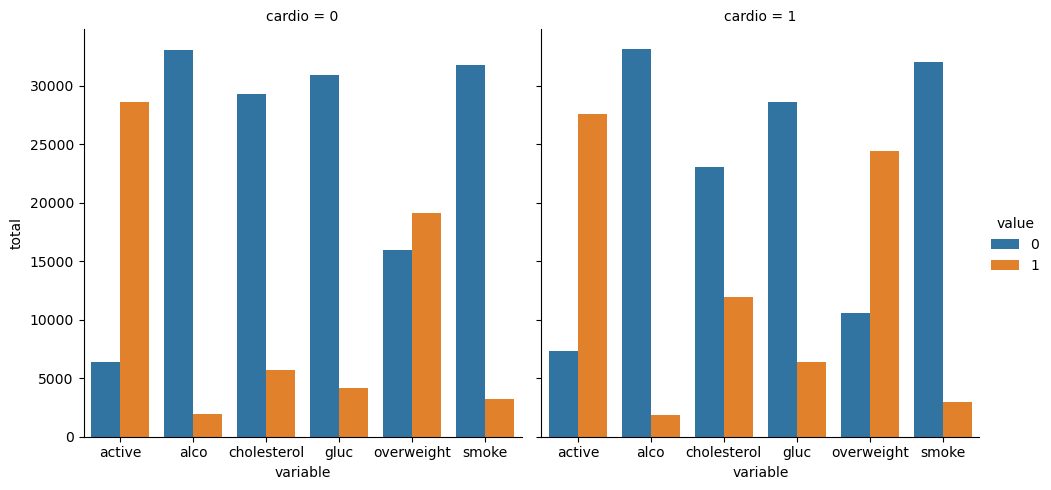

In [41]:
draw_cat_plot()

In [38]:
def draw_heat_map():
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
    (df['height'] >= df['height'].quantile(0.025)) & 
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) & 
    (df['weight'] <= df['weight'].quantile(0.975)) 
    ]

    corr = df_heat.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(12, 10))

    sns.heatmap(
        corr,
        mask=mask,
        annot=True,     
        fmt=".1f",      
        center=0,       
        vmax=0.3,       
        square=True,    
        linewidths=0.5, 
        cbar_kws={"shrink": 0.5}
    ) 

    return fig


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


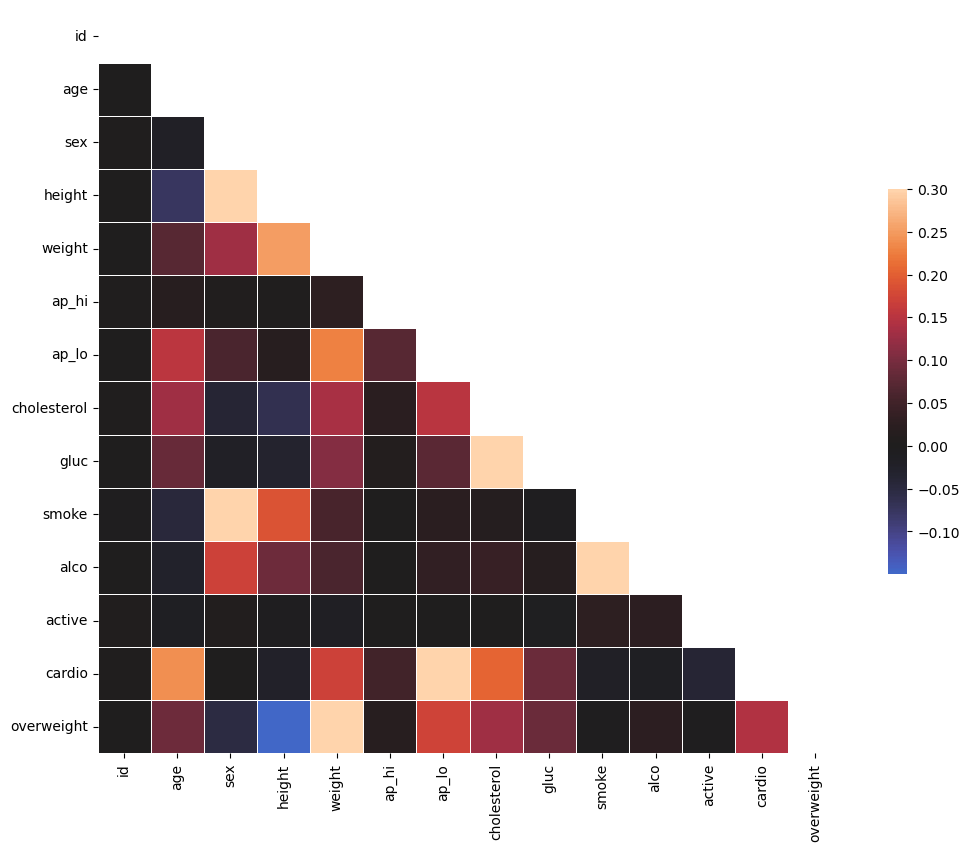

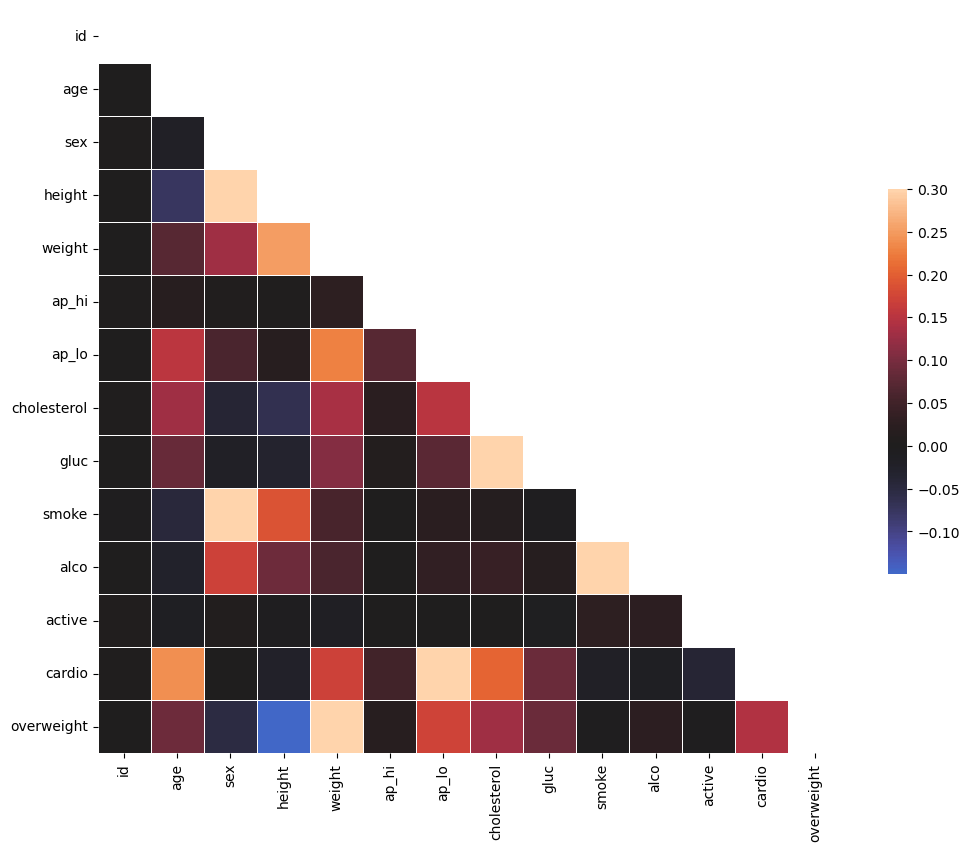

In [39]:
draw_heat_map()
